# TRES MÉTODOS DISTINTOS PARA HACER UNA ESTIMACIÓN MCO EN PYTHON

## NECESITAMOS

- [DATOS](https://github.com/mmngreco/estimacion_mco/blob/master/files/datos.xls?raw=true)
- LIBRERIAS
    - [STATSMODELS](http://statsmodels.sourceforge.net/)
    - [PANDAS](http://pandas.pydata.org/pandas-docs/stable/)
    - [NUMPY](http://docs.scipy.org/doc/numpy/reference/)

In [1]:
# importar las librerias
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# importar los datos
data = pd.read_excel('files/datos.xls', header=1)

In [4]:
# los datos
data

,x,y
0,1114.556392,1883.775735
1,347.784943,1652.178091
2,1415.962928,2518.982543
3,1761.667258,2215.854426
4,33.086990,1521.327516
5,1489.452342,2342.996002
6,619.314942,1512.490636
7,1265.767746,2186.219981
8,147.871262,1540.676060
9,1602.304038,2323.590241


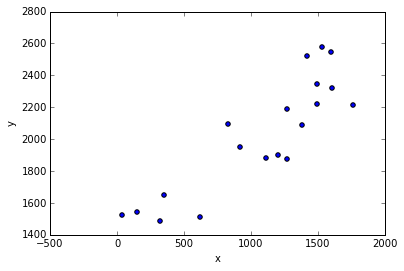

In [4]:
# gráfico de disperción
data.plot(kind='scatter', x='x', y='y')

Vamos a  estimar un modelo MCO normalito, nuestro modelo será:

### $$ y_i = \beta_0 + \beta_1 x_i $$

Según la teoría econométrica, escribimos la ecuación matricialmente:

### $$ y = X\beta + \varepsilon $$ 

Por tanto nuestros parámetros estimados serán:

### $$ \hat\beta = (X^TX)^{-1}X^Ty\ $$

nota: [art. wikipedia](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios)

# MÉTODO 1
## Numpy y la matriz de parámetros estimados



In [9]:
# mco con numpy
x = np.vstack([[1] * len(data.x), list(data.x)])

# agregar el termino independiente
x = np.asmatrix(x.T)

x

matrix([[  1.00000000e+00,   1.11455639e+03],
        [  1.00000000e+00,   3.47784943e+02],
        [  1.00000000e+00,   1.41596293e+03],
        [  1.00000000e+00,   1.76166726e+03],
        [  1.00000000e+00,   3.30869901e+01],
        [  1.00000000e+00,   1.48945234e+03],
        [  1.00000000e+00,   6.19314942e+02],
        [  1.00000000e+00,   1.26576775e+03],
        [  1.00000000e+00,   1.47871262e+02],
        [  1.00000000e+00,   1.60230404e+03],
        [  1.00000000e+00,   1.26711107e+03],
        [  1.00000000e+00,   9.14036264e+02],
        [  1.00000000e+00,   1.37657267e+03],
        [  1.00000000e+00,   1.20078564e+03],
        [  1.00000000e+00,   1.59896709e+03],
        [  1.00000000e+00,   3.16874205e+02],
        [  1.00000000e+00,   8.28286193e+02],
        [  1.00000000e+00,   1.49327377e+03],
        [  1.00000000e+00,   1.52712308e+03]])

In [12]:
# convertir en matriz
y = data.y
y = np.asmatrix(y).T
y

matrix([[ 1883.77573485],
        [ 1652.1780913 ],
        [ 2518.98254337],
        [ 2215.85442624],
        [ 1521.32751605],
        [ 2342.996002  ],
        [ 1512.49063626],
        [ 2186.21998145],
        [ 1540.67605959],
        [ 2323.59024057],
        [ 1873.56383646],
        [ 1948.79206636],
        [ 2091.27095626],
        [ 1902.14038347],
        [ 2545.74658461],
        [ 1488.36229513],
        [ 2096.87785078],
        [ 2221.44589198],
        [ 2577.19679927]])

In [15]:
# resultados
beta_hat = (x.T * x) ** -1 * x.T * y
beta_hat

In [96]:
# y estimado
y_hat = np.asmatrix(x) * beta_hat 
y_hat

matrix([[ 2049.88448486],
        [ 1598.01664519],
        [ 2227.50706158],
        [ 2431.23487279],
        [ 1412.56127342],
        [ 2270.81527678],
        [ 1758.03261144],
        [ 2138.99519484],
        [ 1480.20505549],
        [ 2337.32016796],
        [ 2139.78683096],
        [ 1931.71550901],
        [ 2204.29389992],
        [ 2100.7004436 ],
        [ 2335.35366312],
        [ 1579.8005675 ],
        [ 1881.18193815],
        [ 2273.06729199],
        [ 2293.0151074 ]])

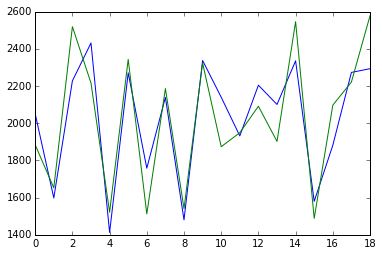

In [124]:
# gráfico de la serie y e y_estimado
pd.Series(np.asarray(y_hat).flatten()).plot()
data.y.plot()

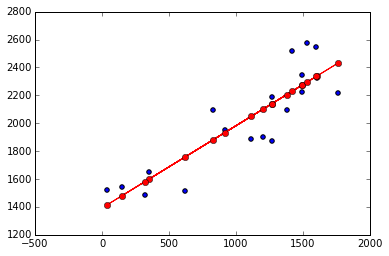

In [122]:
# gráfico de dispoerción y regresión
plt.scatter(x=data.x, y=data.y)
plt.plot(data.x, np.asarray(y_hat).flatten(), color='red', marker='o')

# MÉTODO 2
# Pandas y el método OLS

In [20]:
# dataframe
data

,x,y
0,1114.556392,1883.775735
1,347.784943,1652.178091
2,1415.962928,2518.982543
3,1761.667258,2215.854426
4,33.086990,1521.327516
5,1489.452342,2342.996002
6,619.314942,1512.490636
7,1265.767746,2186.219981
8,147.871262,1540.676060
9,1602.304038,2323.590241


In [49]:
# modelo
modelo2 = pd.ols(x=data.x, y=data.y, intercept=True)
modelo2


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         19
Number of Degrees of Freedom:   2

R-squared:         0.7667
Adj R-squared:     0.7530

Rmse:            180.0686

F-stat (1, 17):    55.8637, p-value:     0.0000

Degrees of Freedom: model 1, resid 17

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.5893     0.0788       7.47     0.0000     0.4348     0.7439
     intercept  1393.0627    93.9023      14.84     0.0000  1209.0142  1577.1112
---------------------------------End of Summary---------------------------------

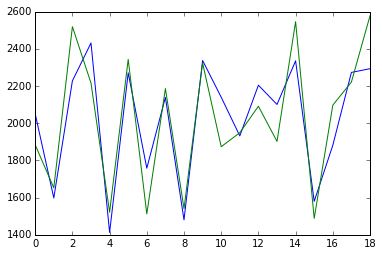

In [55]:
# grafico de las series y e y_estimado
modelo2.y_fitted.plot()
data.y.plot()

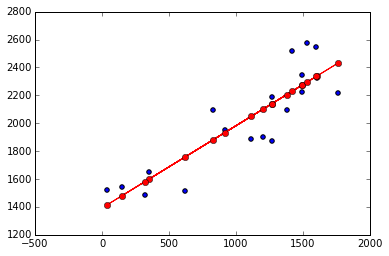

In [121]:
#gráfico de disperción y regresión
plt.plot(modelo2.x.x, modelo2.y_fitted, color='red', marker='o')
plt.scatter(x=modelo2.x.x, y=modelo2.y)

# MÉTODO 3
## Statsmodels

In [ ]:
# definir x e y
x = data.x
# agregar constante
x = sm.add_constant(x)
y = data.y

In [ ]:
# modelo
modelo = sm.OLS(endog=y, exog=x)

In [ ]:
# regresión
regresion = modelo.fit()

In [24]:
# resumen
regresion.summary()

/Users/mmngreco/anaconda/envs/py3/lib/python3.4/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sun, 13 Sep 2015   Prob (F-statistic):           9.09e-07
Time:                        11:25:58   Log-Likelihood:                -124.58
No. Observations:                  19   AIC:                             253.2
Df Residuals:                      17   BIC:                             255.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1393.0627     93.902     14.835      0.000      1194.946  1591.179
x              0.5893      0.079      7.474      0.000         0.423     0.756
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   2.477
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.890
Skew:                           0.115   Prob(JB):                        0.641
Kurtosis:                       1.965   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# parámetros
regresion.params

const    1393.062703
x           0.589312
dtype: float64

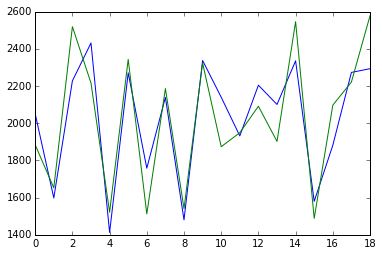

In [80]:
# gráfico de las series y e y_estimado
regresion.fittedvalues.plot()
data.y.plot()

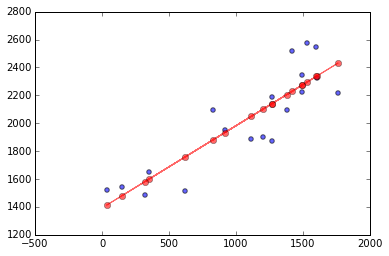

In [44]:
# gráfico de disperción y regresión

plt.plot(data.x, regresion.fittedvalues, color='red', marker='o', alpha=0.6)
plt.scatter(x=data.x, y=data.y, alpha=0.6)

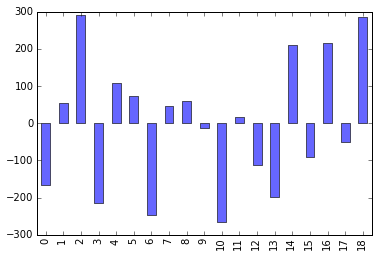

In [48]:
# residuos
regresion.resid.plot(kind='bar',alpha=0.6)